<a href="https://colab.research.google.com/github/JinaaK/mulcamp34/blob/main/plotly_240109.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly

plotly.__version__

'5.18.0'

In [ ]:
# 그래프가 안나올 때 이걸 검색
import plotly.io as pio
pio.renderers

# 그리고 설치
import plotly.io as pio
pio.renderers.default = 'jupyterlab'

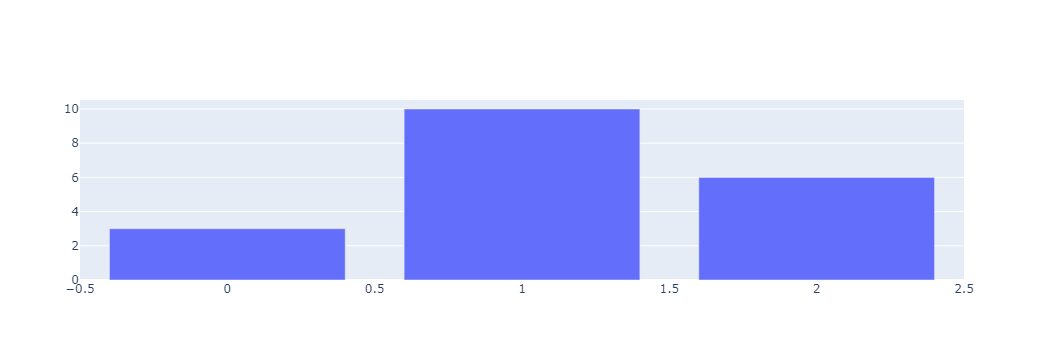

In [ ]:
import plotly.graph_objects as go

# 데이터 불러오기
y = [3, 10, 6]

#fig = go.Figure() 함수로 기본 그래프 생성
fig = go.Figure(
    # 데이터 입력
    data = [go.Bar(y=y)]
)

fig.show()

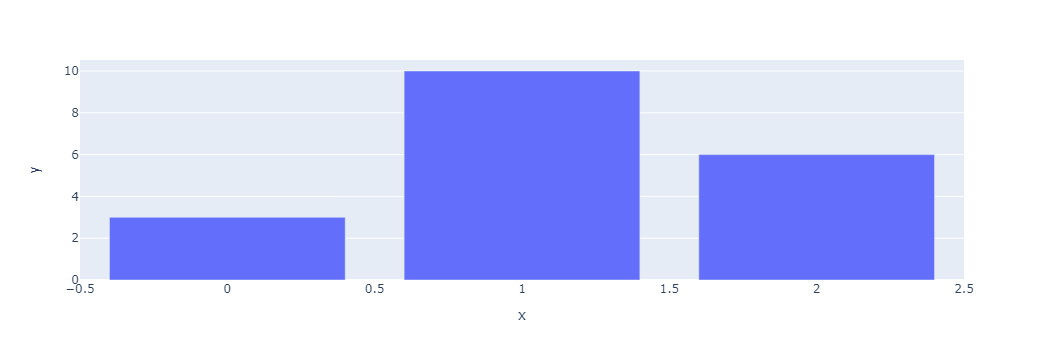

In [ ]:
import plotly.express as px

y = [3, 10, 6]

fig = px.bar(y=y)

#show하면 내 노트북 (주피터 노트북 등)에 그래프가 나타남.
fig.show()

## 파일 목록 확인

In [ ]:
import os # 경로와 관련된 라이브러리
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./kaggle/input\kaggle-survey-2019\multiple_choice_responses.csv
./kaggle/input\kaggle-survey-2019\other_text_responses.csv
./kaggle/input\kaggle-survey-2019\questions_only.csv
./kaggle/input\kaggle-survey-2019\survey_schema.csv
./kaggle/input\kaggle-survey-2020\kaggle_survey_2020_responses.csv
./kaggle/input\kaggle-survey-2020\supplementary_data\kaggle_survey_2020_answer_choices.pdf
./kaggle/input\kaggle-survey-2020\supplementary_data\kaggle_survey_2020_methodology.pdf
./kaggle/input\kaggle-survey-2021\kaggle_survey_2021_responses.csv
./kaggle/input\kaggle-survey-2021\supplementary_data\kaggle_survey_2021_answer_choices.pdf
./kaggle/input\kaggle-survey-2021\supplementary_data\kaggle_survey_2021_methodology.pdf


## 데이터 불러오기

In [ ]:
# 2021년 설문조사 데어터
import pandas as pd
import numpy as np

df = pd.read_csv("./kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")
df.head(2)

C:\Users\lg\AppData\Local\Temp\ipykernel_26604\2038464677.py:5: DtypeWarning:

Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.



,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
questions = df.iloc[0, :].T # T : 행과 열을 바꿔주는 것
questions

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q38_B_Part_8                           In the next 2 years, do you hope to become mor...
Q38_B_Part_9                           In the next 2 years, do you hope to become mor...
Q38_B_Part_10                          In the next 2 years, do you hope to become mor...
Q38_B_Part_11                          In the next 2 years, do you hope to become mor...
Q38_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 369,

In [ ]:
df = df.iloc[1:, :].reset_index(drop=True)  # reset_index(drop=True) 인덱스 번호 재정렬
df.head(2)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Q25'].value_counts()

Q25
$0-999              3369
1,000-1,999          969
10,000-14,999        950
30,000-39,999        741
100,000-124,999      725
5,000-7,499          699
50,000-59,999        697
40,000-49,999        688
20,000-24,999        587
2,000-2,999          575
15,000-19,999        573
7,500-9,999          552
60,000-69,999        551
25,000-29,999        469
70,000-79,999        464
4,000-4,999          456
150,000-199,999      392
80,000-89,999        391
3,000-3,999          380
125,000-149,999      379
90,000-99,999        350
200,000-249,999      177
300,000-499,999       91
250,000-299,999       75
>$1,000,000           58
$500,000-999,999      32
Name: count, dtype: int64

In [ ]:
temp = pd.DataFrame({
  "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
  "Contestant": ["Alex", "Alex", "Alex", "Jordan", "Jordan", "Jordan"],
  "Number Eaten": [2, 1, 3, 1, 3, 2],
})

temp

,Fruit,Contestant,Number Eaten
0,Apples,Alex,2
1,Oranges,Alex,1
2,Bananas,Alex,3
3,Apples,Jordan,1
4,Oranges,Jordan,3
5,Bananas,Jordan,2


## express 방식
- 막대 그래프 그리기

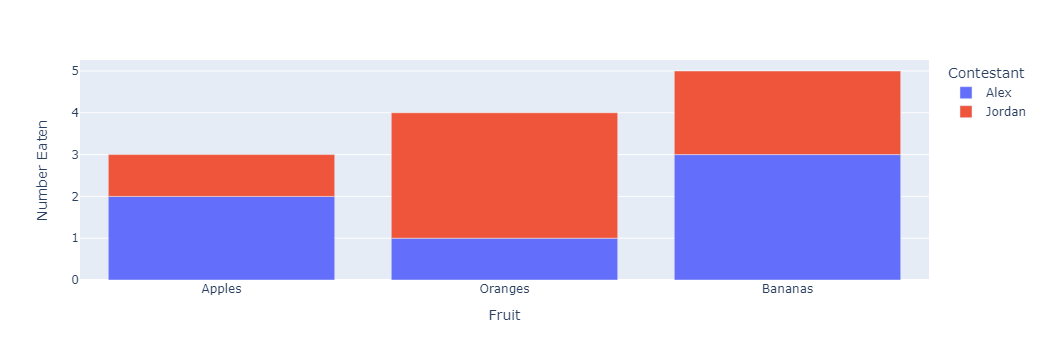

In [ ]:
import plotly.express as px
fig = px.bar(temp, x = 'Fruit', y = 'Number Eaten', color = 'Contestant') #barmode
fig.show()

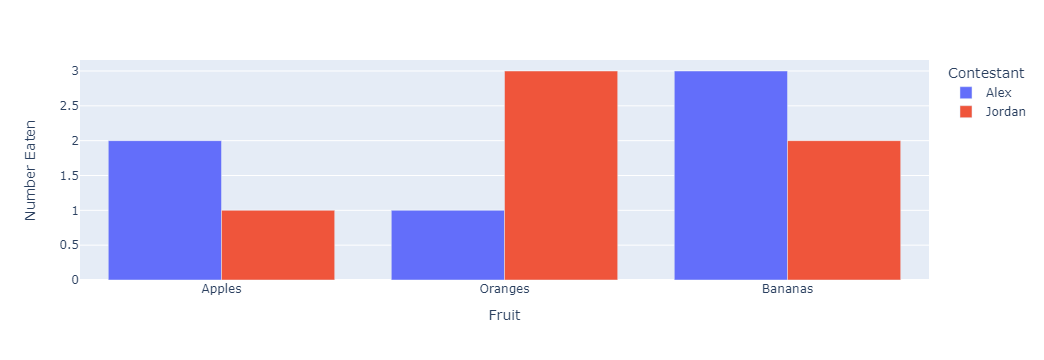

In [ ]:
import plotly.express as px
fig = px.bar(temp, x = 'Fruit', y = 'Number Eaten', color = 'Contestant', barmode = 'group') #barmode
fig.show()

In [ ]:
long_df = px.data.medals_long()
long_df

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12


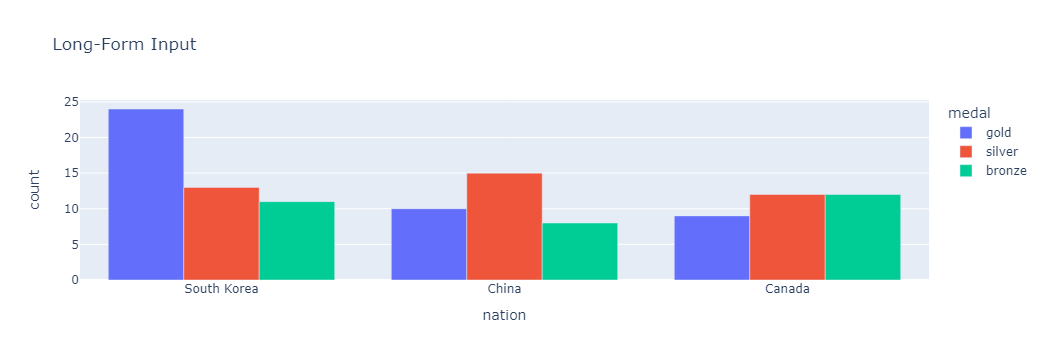

In [ ]:
fig = px.bar(long_df, x = 'nation', y = 'count',
             color = 'medal',
             barmode = 'group',
             title = 'Long-Form Input'
            ) #barmode
fig.show()

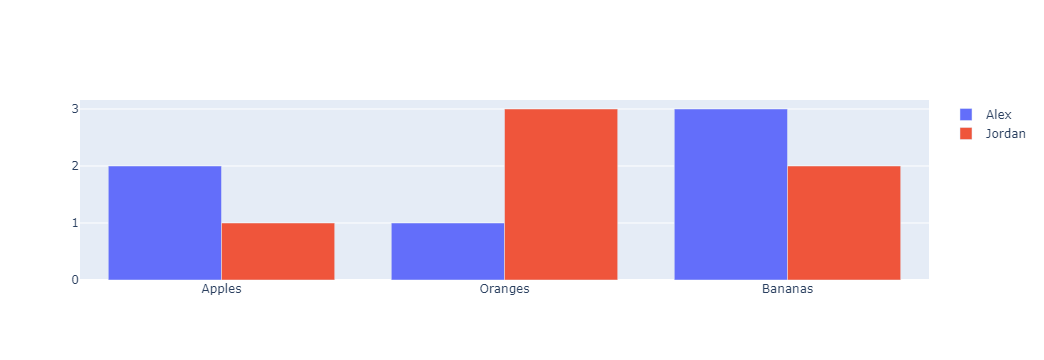

In [ ]:
import plotly.graph_objects as go # 너무 길어서 express 방식으로 하는게 좋음 (대신 커스텀 바꾸는건 포기해야함)
fig = go.Figure()
fig.add_trace(go.Bar(name = "Alex", x = temp['Fruit'], y = temp[temp['Contestant'] == "Alex"]['Number Eaten'].values))
fig.add_trace(go.Bar(name = "Jordan", x = temp['Fruit'], y = temp[temp['Contestant'] == "Jordan"]['Number Eaten'].values))
fig.update_layout(barmode='group')
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(name = "Alex", x = temp['Fruit'], y = temp[temp['Contestant'] == "Alex"]['Number Eaten'].values))
fig.add_trace(go.Bar(name = "Jordan", x = temp['Fruit'], y = temp[temp['Contestant'] == "Jordan"]['Number Eaten'].values))
fig.update_layout(barmode='group')
fig.show('json')

## 응답자의 연령대 시각화

In [ ]:
df['Q1'].value_counts()

Q1
25-29    4931
18-21    4901
22-24    4694
30-34    3441
35-39    2504
40-44    1890
45-49    1375
50-54     963
55-59     592
60-69     553
70+       128
Name: count, dtype: int64

## Q1 막대 그래프
- 위 결과값을 q1_df 저장

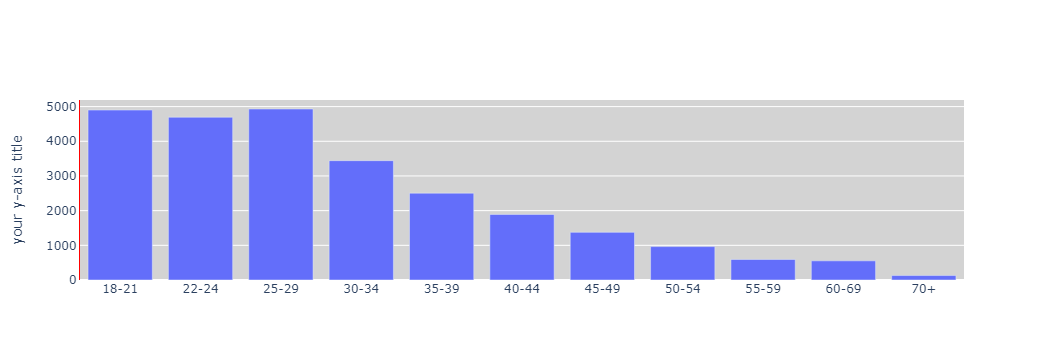

In [ ]:
q1_df = df['Q1'].value_counts()

CATEGORY_ORDER = ["18-21", "22-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-69", "70+"]

fig = go.Figure()
fig.add_trace(
    #시각화 종류
    go.Bar(x = q1_df.index, y = q1_df.values)
) #시각화 차트 생성

#시각화 스타일을 변경
fig.update_layout(
    xaxis = dict(categoryorder = 'array', categoryarray = CATEGORY_ORDER),
    yaxis = dict(title = 'your y-axis title', linecolor = 'red'),
    plot_bgcolor='lightgrey'
)

fig.show()

In [ ]:
df['Q2'].value_counts()

Q2
Man                        20597
Woman                       4890
Prefer not to say            355
Nonbinary                     88
Prefer to self-describe       42
Name: count, dtype: int64

In [ ]:
q1_q2_df = df.loc[:, ["Q1", "Q2"]].replace({'Prefer not to say':'etc', 'Nonbinary':"etc", "Prefer to self-describe": "etc"})
q1_q2_df['Q2'].value_counts()

Q2
Man      20597
Woman     4890
etc        485
Name: count, dtype: int64

In [ ]:
q1_q2_df = q1_q2_df.groupby(['Q2','Q1']).size().reset_index().rename(columns = {0:"Count"})
q1_q2_df.head()

,Q2,Q1,Count
0,Man,18-21,3696
1,Man,22-24,3643
2,Man,25-29,3859
3,Man,30-34,2765
4,Man,35-39,1993


In [ ]:
q1_q2_df.tail()

,Q2,Q1,Count
28,etc,45-49,29
29,etc,50-54,17
30,etc,55-59,11
31,etc,60-69,14
32,etc,70+,10


Man
--------------------------------------------------
Woman
--------------------------------------------------
etc
--------------------------------------------------


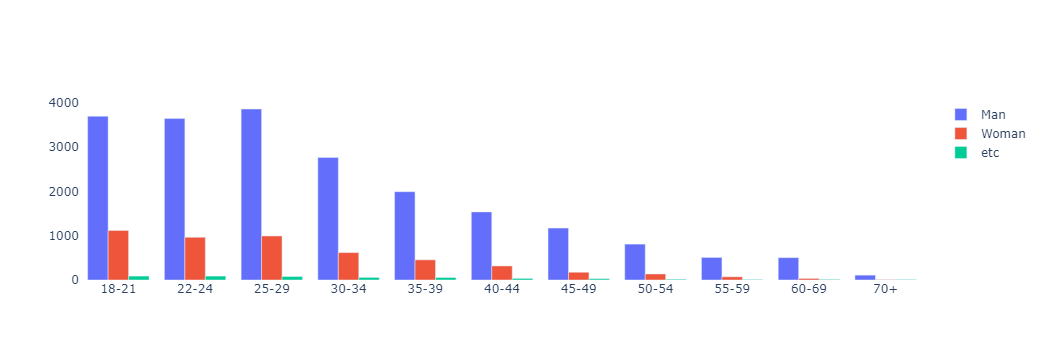

In [ ]:
# 반복문 이해를 돕기위한 코드
fig = go.Figure()
for gender, group in q1_q2_df.groupby('Q2'):
    print(gender)
    fig.add_trace(go.Bar(x = group['Q1'], y = group['Count'], name=gender))
    print('-' * 50)
fig.update_layout(plot_bgcolor='white')

fig.show()

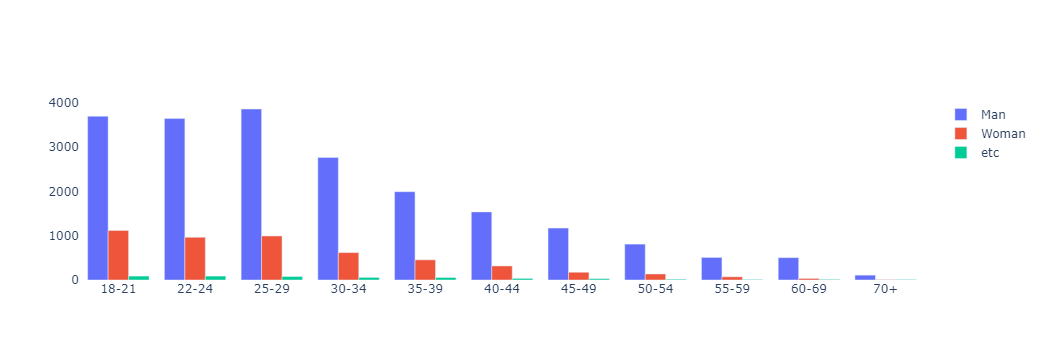

In [ ]:
fig = go.Figure()
for gender, group in q1_q2_df.groupby('Q2'):
    #print(gender, group)
    fig.add_trace(go.Bar(x = group['Q1'], y = group['Count'], name=gender))
fig.update_layout(plot_bgcolor='white')

fig.show()

## Q3

In [ ]:
q3_df = df['Q3'].value_counts()
q3_df

Q3
India                       7433
United States of America    2650
Other                       1270
Japan                        921
China                        814
                            ... 
Kazakhstan                    45
Norway                        45
Algeria                       44
Ethiopia                      43
Iraq                          43
Name: count, Length: 66, dtype: int64

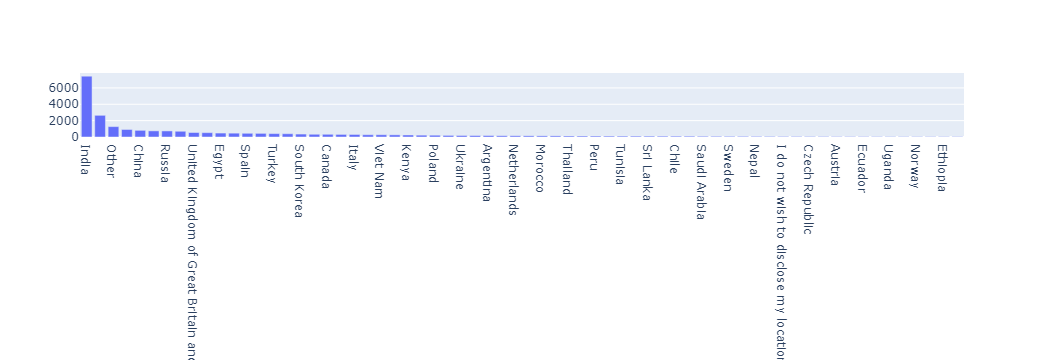

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = q3_df.index, y = q3_df.values))
fig.show()

In [ ]:
q3_q25 = df.loc[:, ['Q3', 'Q25']]
q3_q25.head(5)

,Q3,Q25
0,Indonesia,"60,000-69,999"
1,Pakistan,$0-999
2,Mexico,"30,000-39,999"
3,India,"30,000-39,999"
4,India,NaN


In [ ]:
q3_q25['Q25'].value_counts()

q3_q25['Q25'] = q3_q25['Q25'].replace(['$0-999', '1,000-1,999'], '$0-1,999') # replace에서 [] 안에 있는 것이 기존값, 그 밖이 새로운 값
q3_q25['Q25'].value_counts()[0]

C:\Users\lg\AppData\Local\Temp\ipykernel_26604\1381756674.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



4338

In [ ]:
q3_q25['Q25'] = q3_q25['Q25'].replace(['$0-999', '1,000-1,999'], '$0-1,999')
q3_q25['Q25'] = q3_q25['Q25'].replace(['2,000-2,999', '3,000-3,999'], '$2,000-3,999')
q3_q25['Q25'] = q3_q25['Q25'].replace(['4,000-4,999', '5,000-7,499'], '$4,000-7,499')
q3_q25['Q25'] = q3_q25['Q25'].replace(['25,000-29,999', '60,000-69,999',
                       '30,000-39,999','15,000-19,999', '70,000-79,999',
                       '10,000-14,999', '20,000-24,999', '7,500-9,999',
                       '100,000-124,999', '40,000-49,999', '50,000-59,999',
                       '300,000-499,999', '200,000-249,999', '125,000-149,999',
                       '250,000-299,999', '80,000-89,999', '90,000-99,999',
                       '150,000-199,999', '>$1,000,000', '$500,000-999,999'], '$7,500+')

q3_q25['Q25'].value_counts()

Q25
$7,500+         8942
$0-1,999        4338
$4,000-7,499    1155
$2,000-3,999     955
Name: count, dtype: int64

In [ ]:
q3_q25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25972 entries, 0 to 25971
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q3      25972 non-null  object
 1   Q25     15390 non-null  object
dtypes: object(2)
memory usage: 405.9+ KB


In [ ]:
q3_q25 = q3_q25.dropna(subset=['Q25']) #결측치 삭제
q3_q25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15390 entries, 0 to 25971
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q3      15390 non-null  object
 1   Q25     15390 non-null  object
dtypes: object(2)
memory usage: 360.7+ KB


In [ ]:
q3_q25 = q3_q25.groupby(['Q3','Q25']).size().reset_index().rename(columns = {0:"Count"})
q3_q25

,Q3,Q25,Count
0,Algeria,"$0-1,999",14
1,Algeria,"$2,000-3,999",1
2,Algeria,"$4,000-7,499",3
3,Algeria,"$7,500+",5
4,Argentina,"$0-1,999",34
...,...,...,...
254,United States of America,"$7,500+",1669
255,Viet Nam,"$0-1,999",86
256,Viet Nam,"$2,000-3,999",15
257,Viet Nam,"$4,000-7,499",15


In [ ]:
india_df = q3_q25.loc[q3_q25['Q3'] == 'India', :].reset_index(drop=True)
india_df

,Q3,Q25,Count
0,India,"$0-1,999",1214
1,India,"$2,000-3,999",239
2,India,"$4,000-7,499",451
3,India,"$7,500+",1471


In [ ]:
usa_df = q3_q25.loc[q3_q25['Q3'] == 'United States of America', :].reset_index(drop=True)
usa_df

,Q3,Q25,Count
0,United States of America,"$0-1,999",140
1,United States of America,"$2,000-3,999",19
2,United States of America,"$4,000-7,499",17
3,United States of America,"$7,500+",1669


In [ ]:
india_df['Percentage'] = india_df['Count']/india_df['Count'].sum()
usa_df['Percentage'] = usa_df['Count']/usa_df['Count'].sum()

In [ ]:
india_df['%'] = np.round(india_df['Percentage']*100, 1)
usa_df['%'] = np.round(usa_df['Percentage']*100, 1)

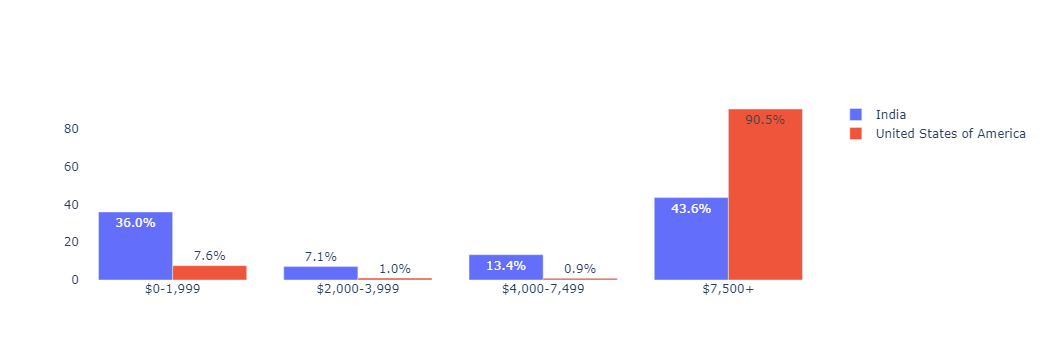

In [ ]:
india_usa_df = pd.concat([india_df, usa_df]).reset_index()
fig = go.Figure()
for country, group in india_usa_df.groupby("Q3"):
   fig.add_trace(go.Bar(x = group['Q25'],
                        y = group['%'],
                        name = country,
                        text = group['%'].astype(str) + "%",
                        textposition='auto'))
fig.update_layout(barmode="group",
                  plot_bgcolor = "white")
fig.show()